In [176]:
# predict which theme ...
import pandas as pd
import numpy as np

In [177]:
# read data -- sets
setsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile)
#sets.head()

In [178]:
themefile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/themes.csv'
themes = pd.read_csv(themefile)
#themes.head()

In [179]:
setsinvenfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventory_sets.csv'
invenotry_sets = pd.read_csv(setsinvenfile)

In [180]:
invenfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventories.csv'
invenotries = pd.read_csv(invenfile)
#invenotries.head()

In [181]:
invenpartsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventory_parts.csv'
invenotry_parts = pd.read_csv(invenpartsfile)

In [182]:
partsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/parts.csv'
parts = pd.read_csv(partsfile)
#parts.head()

In [183]:
#join sets and themes together
t1 = pd.merge(sets,themes, left_on = 'theme_id', right_on = 'id', suffixes = ('_set','_theme'))

In [184]:
# join t1 with ivnetories, inventoryset inventory parts
t4 = pd.merge(t1,invenotry_sets, on = 'set_num')
t4.head()

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id,quantity
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1
1,6041-1,Armor Shop,1986,199,113,199,Lion Knights,186.0,2216,1
2,10000-1,Guarded Inn,2001,186,256,186,Castle,NaN,7474,1
3,10039-1,Black Falcon's Fortress,2002,186,431,186,Castle,NaN,7474,1
4,1794-1,Dragon Master Chariot,1994,186,36,186,Castle,NaN,5097,1


In [185]:
# then join parts and color and categories, and then join sets with them

#join t2 with color (t2 join inventory and inventory join color)
t3 = pd.merge(parts, invenotry_parts, on = 'part_num')
# drop useless columns
t3.head()

,part_num,name,part_cat_id,inventory_id,color_id,quantity,is_spare
0,0687b1,Set 0687 Activity Booklet 1,17,15235,9999,1,f
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1973,2,1,f
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,1973,2,1,f
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1973,2,1,f
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,1973,2,1,f


In [186]:
t5 = pd.merge(t4, t3, left_on = 'id', right_on = 'inventory_id', how = 'inner',suffixes = ('_inven','_parts'))
t5.head()

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id_inven,quantity_inven,part_num,name,part_cat_id,inventory_id_parts,color_id,quantity_parts,is_spare
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,10197,Technic Pin Connector Hub with 2 Perpendicular...,12,199,72,2,f
1,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,11334,Hero Factory Armour with Spikes,41,199,15,2,f
2,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,41,199,1,1,f
3,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15366,Hero Factory Full Torso Armor with Connector f...,41,199,148,1,f
4,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15376pat01,Large Figure Head Modified Chima Mammoth with ...,41,199,70,1,f


# What sets have the most pieces in them? 

In [187]:
t5.head()


,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id_inven,quantity_inven,part_num,name,part_cat_id,inventory_id_parts,color_id,quantity_parts,is_spare
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,10197,Technic Pin Connector Hub with 2 Perpendicular...,12,199,72,2,f
1,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,11334,Hero Factory Armour with Spikes,41,199,15,2,f
2,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,41,199,1,1,f
3,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15366,Hero Factory Full Torso Armor with Connector f...,41,199,148,1,f
4,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15376pat01,Large Figure Head Modified Chima Mammoth with ...,41,199,70,1,f


In [188]:
df = t5[['name_set','part_num','name']]

In [189]:
df.head()

,name_set,part_num,name
0,Knights' Arsenal,10197,Technic Pin Connector Hub with 2 Perpendicular...
1,Knights' Arsenal,11334,Hero Factory Armour with Spikes
2,Knights' Arsenal,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...
3,Knights' Arsenal,15366,Hero Factory Full Torso Armor with Connector f...
4,Knights' Arsenal,15376pat01,Large Figure Head Modified Chima Mammoth with ...


In [190]:
freq = pd.DataFrame(df['name'].value_counts())
freq = freq.reset_index()
freq = freq.rename(columns={'index':'partname','name':'freq'})
freq.head()

,partname,freq
0,Plate Round 1 x 1 with Solid Stud,3650
1,Plate 1 x 2,2282
2,Plate 1 x 1,1950
3,Slope 30° 1 x 1 x 2/3 (Cheese Slope),1890
4,Plate 1 x 4,1792


In [191]:
df = pd.merge(df,freq,left_on="name",right_on="partname",how="inner")

In [192]:
df.head()

,name_set,part_num,name,partname,freq
0,Knights' Arsenal,10197,Technic Pin Connector Hub with 2 Perpendicular...,Technic Pin Connector Hub with 2 Perpendicular...,9
1,Armor Shop,10197,Technic Pin Connector Hub with 2 Perpendicular...,Technic Pin Connector Hub with 2 Perpendicular...,9
2,Visorak Vohtarak,10197,Technic Pin Connector Hub with 2 Perpendicular...,Technic Pin Connector Hub with 2 Perpendicular...,9
3,Visorak Vohtarak,10197,Technic Pin Connector Hub with 2 Perpendicular...,Technic Pin Connector Hub with 2 Perpendicular...,9
4,Visorak Boggarak,10197,Technic Pin Connector Hub with 2 Perpendicular...,Technic Pin Connector Hub with 2 Perpendicular...,9


In [193]:
df = df[df['freq'] >= 1000]

In [194]:
df = df.drop_duplicates()
len(df)

7599

In [195]:
df.head()

,name_set,part_num,name,partname,freq
1903,Guarded Inn,3001,Brick 2 x 4,Brick 2 x 4,1537
1904,Black Falcon's Fortress,3001,Brick 2 x 4,Brick 2 x 4,1537
1905,Dragon Master Chariot,3001,Brick 2 x 4,Brick 2 x 4,1537
1906,Open Freight Wagon,3001,Brick 2 x 4,Brick 2 x 4,1537
1907,Hopper Wagon,3001,Brick 2 x 4,Brick 2 x 4,1537


In [196]:
df = df.drop('name', axis=1)
df = df.drop('part_num',axis =1)

In [197]:
df.head()

,name_set,partname,freq
1903,Guarded Inn,Brick 2 x 4,1537
1904,Black Falcon's Fortress,Brick 2 x 4,1537
1905,Dragon Master Chariot,Brick 2 x 4,1537
1906,Open Freight Wagon,Brick 2 x 4,1537
1907,Hopper Wagon,Brick 2 x 4,1537


In [205]:
dfname = df.drop('freq',axis=1)
dfname = dfname.groupby('name_set')

In [198]:
len(df['partname'].unique())

17

In [199]:
#partname = df['partname'].unique()
#partname = partname.tolist()
#partname

In [212]:
df =df.drop_duplicates()
df.sort_values(by='freq').head()

,name_set,partname,freq
27008,Reindeer (Legoland California),Tile 1 x 2 with Groove,1003
26191,Boat,Tile 1 x 2 with Groove,1003
26192,Helicopter,Tile 1 x 2 with Groove,1003
26193,Ghostly Hideout,Tile 1 x 2 with Groove,1003
26194,Fire Fighter 4 x 4,Tile 1 x 2 with Groove,1003


In [213]:
import seaborn as sns

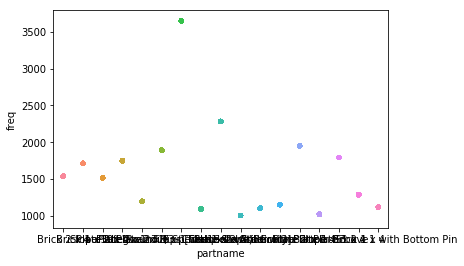

In [214]:
graph = sns.stripplot(x="partname", y="freq", data=df)

In [215]:
#df.plot.bar(x='partname',y='freq',align='center', alpha=0.5)

In [260]:
dfset = pd.DataFrame(df.groupby('name_set').partname.value_counts())
dfset = dfset.groupby(level=0).apply(lambda x: float(x.sum())/x)

dfset = dfset.rename(columns={'partname':'freq'})
dfset= dfset.reset_index()
dfset = dfset.rename(columns={'name_set':'setname'})
dfset

<bound method NDFrame.head of                         setname                                      partname  \
0     'Where Are My Pants?' Guy                                   Brick 1 x 2   
1     'Where Are My Pants?' Guy                                   Brick 1 x 4   
2     'Where Are My Pants?' Guy                                   Brick 2 x 2   
3     'Where Are My Pants?' Guy                                   Brick 2 x 4   
4     'Where Are My Pants?' Guy                                   Plate 2 x 2   
5     'Where Are My Pants?' Guy                                   Plate 2 x 4   
6     'Where Are My Pants?' Guy                                   Plate 2 x 6   
7     'Where Are My Pants?' Guy               Slope 45° 2 x 1 with Bottom Pin   
8              4 × 4 Fire Truck                                   Brick 1 x 2   
9              4 × 4 Fire Truck                                   Brick 1 x 4   
10             4 × 4 Fire Truck                                   Brick 2 x 2  

In [264]:
dfset = dfset[dfset['freq'] >= 17]
dfset.drop_duplicates()
len(dfset)

391

In [266]:
dfset.head()

,setname,partname,freq
8,4 × 4 Fire Truck,Brick 1 x 2,17.0
9,4 × 4 Fire Truck,Brick 1 x 4,17.0
10,4 × 4 Fire Truck,Brick 2 x 2,17.0
11,4 × 4 Fire Truck,Brick 2 x 4,17.0
12,4 × 4 Fire Truck,Legs and Hips [Complete Assembly],17.0


In [271]:
dffreq = dfset.drop('partname',axis=1)
dffreq = dffreq.drop_duplicates()

In [272]:
setname = dffreq.setname.tolist()
freq = dffreq.freq.tolist()
print(setname)
print(freq)

['4 × 4 Fire Truck', 'Car', 'City Fire Accessory Set', 'Fire ATV', 'Fire Boat', 'Fire Car', 'Fire Helicopter', 'Fire Hovercraft', 'Fire Motorcycle', 'Fire Plane', 'Fire Rescue', 'Fire Station', 'Fire Truck', 'Fireboat', 'Firefighter', 'Gahlok-Kal', 'Kohrak-Kal', 'Lehvak-Kal', 'Nuhvok-Kal', 'Off-Road Fire Rescue', 'Off-Road Fire Truck & Fireboat', 'Pahrak-Kal', 'Tahnok-Kal']
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]


In [273]:
%matplotlib inline

In [274]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure


from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

In [276]:
a = setname
b = freq

c = dict()
c = {idx: group['partname'].tolist() 
        for idx, group in dfset.groupby('setname')}
type(c)

sort = sorted(c, key=lambda k: len(c[k]),reverse = True)
#print(sort)

print(c)
value = list()
for key in sort:
    value.append(c.get(key))

{'4 × 4 Fire Truck': ['Brick 1 x 2', 'Brick 1 x 4', 'Brick 2 x 2', 'Brick 2 x 4', 'Legs and Hips [Complete Assembly]', 'Plate 1 x 1', 'Plate 1 x 2', 'Plate 1 x 3', 'Plate 1 x 4', 'Plate 2 x 2', 'Plate 2 x 4', 'Plate 2 x 6', 'Plate Round 1 x 1 with Solid Stud', 'Slope 30° 1 x 1 x 2/3 (Cheese Slope)', 'Slope 45° 2 x 1 with Bottom Pin', 'Tile 1 x 2 with Groove', 'Tile Special 1 x 2 Grille with Bottom Groove'], 'Car': ['Brick 1 x 2', 'Brick 1 x 4', 'Brick 2 x 2', 'Brick 2 x 4', 'Legs and Hips [Complete Assembly]', 'Plate 1 x 1', 'Plate 1 x 2', 'Plate 1 x 3', 'Plate 1 x 4', 'Plate 2 x 2', 'Plate 2 x 4', 'Plate 2 x 6', 'Plate Round 1 x 1 with Solid Stud', 'Slope 30° 1 x 1 x 2/3 (Cheese Slope)', 'Slope 45° 2 x 1 with Bottom Pin', 'Tile 1 x 2 with Groove', 'Tile Special 1 x 2 Grille with Bottom Groove'], 'City Fire Accessory Set': ['Brick 1 x 2', 'Brick 1 x 4', 'Brick 2 x 2', 'Brick 2 x 4', 'Legs and Hips [Complete Assembly]', 'Plate 1 x 1', 'Plate 1 x 2', 'Plate 1 x 3', 'Plate 1 x 4', 'Plate 

In [279]:
fruits = setname
counts = freq
name = value

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, names = name, color=Spectral6))

hover = HoverTool(tooltips=[
    ("partName", "@names"),
    ("count", "@counts")
])

p = figure(x_range=fruits, y_range=(0,20), plot_height=500, tools=[hover], title="Fruit Counts",
           toolbar_location=None)

p.vbar(x='fruits', top='counts', width=0.9, color='color',legend=None, source=source)

p.xaxis.major_label_orientation = "vertical"
p.xgrid.grid_line_color = None

#p.legend.orientation = "horizontal"
#p.legend.location = "top_right"
#p.legend.orientation = "vertical"

#new_legend = p.legend[0]
#p.legend[0].plot = None
#p.add_layout(new_legend, 'right')

/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('color', 6), ('counts', 23), ('fruits', 23), ('names', 23)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [280]:
show(p)

W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='32411ad3-0438-4ab6-be9c-99f107aadeeb', ...)
W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='23b140f1-a781-4090-883b-fc14f4803292', ...)
W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='de0effa2-d268-4618-9493-4cf81c1ad675', ...)
W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='5d5856d1-02ab-45c2-913d-b0b4bbff1190', ...)
